In [1]:
import rmsp
rmsp.activate()
rmsp.support()

License f38191bcf6eb06b5 checked out by hadavand@resmodsol.com to f087b30fe8f0d8d6 expires in 52 minutes. RMSP version 1.8.12 is out of date. There is a new version 1.9.4 featuring new high yield restrictions, MIK threshold summaries and generating subgrids from meshes, as well as a number of other optimizations, improvements, and fixes! Visit https://portal.resourcemodelingsolutions.com to download the updated version. After upgrading this message may not update immediately.

Python and RMSP Versions Support Information:
 - python version: sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
 - rmsp version: 1.8.12
 - numpy version: 1.21.5
 - pandas version: 1.3.4
 - matplotlib version: 3.1.3
 - platform: Windows-10-10.0.19041-SP0

For documentation and self service assistance please visit https://portal.resourcemodelingsolutions.com
For additional support please contact Resource Modeling Solutions at support@resmodsol.com



In [6]:
import numpy as np
from matplotlib import pyplot as plt
def fix_ipython_autocomplete(enable=True):
    r"""Change autocomplete behavior for IPython > 6.x

    Parameter
    ---------
    enable : bool (default True)
        Is use the trick.

    Notes
    -----
    Since IPython > 6.x the ``jedi`` package is using for autocomplete by default.
    But in some cases, the autocomplete doesn't work correctly wrong (see e.g.
    `here <https://github.com/ipython/ipython/issues/11653>`_).

    To set the correct behaviour we should use in IPython environment::

        %config Completer.use_jedi = False

    or add to IPython config (``<HOME>\.ipython\profile_default\ipython_config.py``)::

        c.Completer.use_jedi = False

    """
    try:
        __IPYTHON__
    except NameError:
        pass
    else:
        from IPython import __version__

        major = int(__version__.split(".")[0])
        if major >= 6:
            from IPython import get_ipython

            get_ipython().Completer.use_jedi = not enable
            # print('Attempt to fix autocomplete!')
fix_ipython_autocomplete()

In [70]:
def plot_45(ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    min_p = min(xlim[0], ylim[0])
    max_p = max(xlim[1], ylim[1])
    ax.plot([min_p,max_p], [min_p,max_p], lw=2, label='45 degree line', c='k', ls='--')

def plot_line(ax, a,b):
    x = np.array(ax.get_xlim())
    y = a*x+b
    ax.plot(x, y, lw=2, label='regression line')

Note that the estimate will have the same variance as the covariance between the estimate and the response variable resulting in conditional unbiasedness (regression line being the 45 degree line)

y = 0.80x+0.0
y = 1.01x+0.0


array([[0.64273318, 0.64639798],
       [0.64639798, 1.0099184 ]])

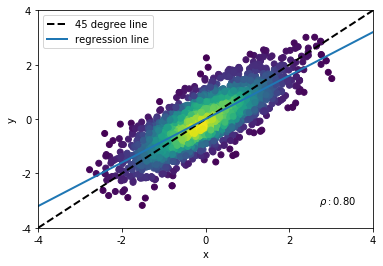

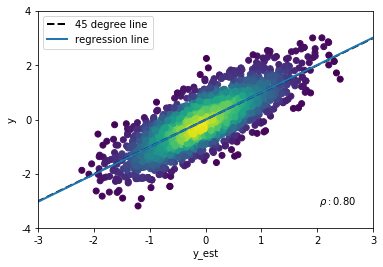

In [79]:
mean = [0, 0]
cov = np.array([[1, 0.8], [0.8, 1]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T
data = rmsp.GeoDataFrame(columns=['x', 'y'], data=np.vstack([x,y]).T)

# regression line between x and y
a = cov[0,1]/cov[0,0]
b = a * mean[0] - mean[1]
print(f'y = {a:.2f}x+{b}')

data['y_est'] = a* data['x'] + b

fig,ax,cax = data.scatplot('x', 'y')
plot_45(ax)
plot_line(ax, a,b)
ax.legend()


fig,ax,cax = data.scatplot('y_est', 'y')
# regression line between estimator and y
cov = np.cov(data['y_est'],data['y'])
a = cov[0,1]/cov[0,0]
b = a * mean[0] - mean[1]
print(f'y = {a:.2f}x+{b}')
plot_45(ax)
plot_line(ax, a,b)
ax.legend()

np.cov(data['y_est'], data['y'])

The perfect linear correlation results in a line in the bivariate plot. The 45 degree line is only used to assess two data with the same mean and variance or in practice to compare true vs estimate

y = 3.0000000000000013x+0.0


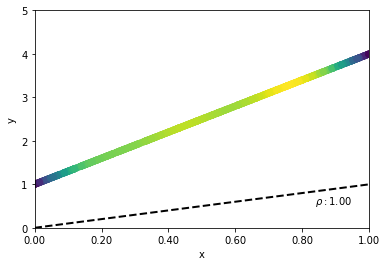

In [73]:
x = np.random.rand(1000)
y = 3 * x + 1
data = rmsp.GeoDataFrame(columns=['x', 'y'], data=np.vstack([x,y]).T)
cov = np.cov(x,y)
a = cov[0,1]/cov[0,0]
b = a * mean[0] - mean[1]
print(f'y = {a}x+{b}')
fig,ax,cax = data.scatplot()
plot_45(ax)